In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
with open('produtos.json','r',encoding="utf-8") as f:
    data = json.loads(f.read())

In [4]:
df = pd.json_normalize(data, record_path =['produtos'])

In [5]:
df

,nome_petz,nome_cobasi,marca_petz,marca_cobasi,preco_petz,preco_cobasi,similaridade
0,Ração Premier Raças Específicas para Golden Re...,Ração Premier Raças Específicas Lhasa Apso Adu...,Premier Pet,Premier,215.99,214.90,1.717949
1,Ração Premier Fórmula para Cães Sênior de Port...,Ração Premier Formula Cães Filhotes Raças Gran...,Premier Pet,Premier,251.99,259.90,1.805687
2,Ração Golden Special para Cães Adultos Sabor F...,Ração Golden Special para Cães Adultos Frango ...,Premier Pet,Golden,149.99,149.90,1.843931
3,Ração Golden Power Training para Cães Adultos ...,Ração Golden Power Training para Cães Adultos ...,Premier Pet,Golden,169.90,169.90,1.876289
4,Ração Golden Fórmula para Cães Senior Sabor Fr...,Ração Golden Fórmula para Cães Adultos Frango ...,Premier Pet,Golden,176.90,162.90,1.804469
...,...,...,...,...,...,...,...
994,Brinquedo Furacão Pet Bola de Borracha Maciça ...,Brinquedo Mordedor Peixe de Borracha Furacão P...,Furacão Pet,Furacao Pet,11.99,12.50,1.721649
995,Brinquedo LCM Bola de Borracha Extra Forte par...,Brinquedo de Borracha Estrela Furacão Pet Rosa...,LCM,Furacao Pet,11.99,13.90,1.666667
996,Brinquedo LCM Bola de Tênis Extra Forte para C...,Brinquedo Anel Extra Forte de Borracha Maciça ...,LCM,LCM,29.99,27.90,1.666667
997,Brinquedo Art Injet Bola PVC 100mm com Cravos ...,Brinquedo Tubo Mordedor para Cães Cores Sortid...,Art Injet,VillaPet,39.99,39.88,1.625000


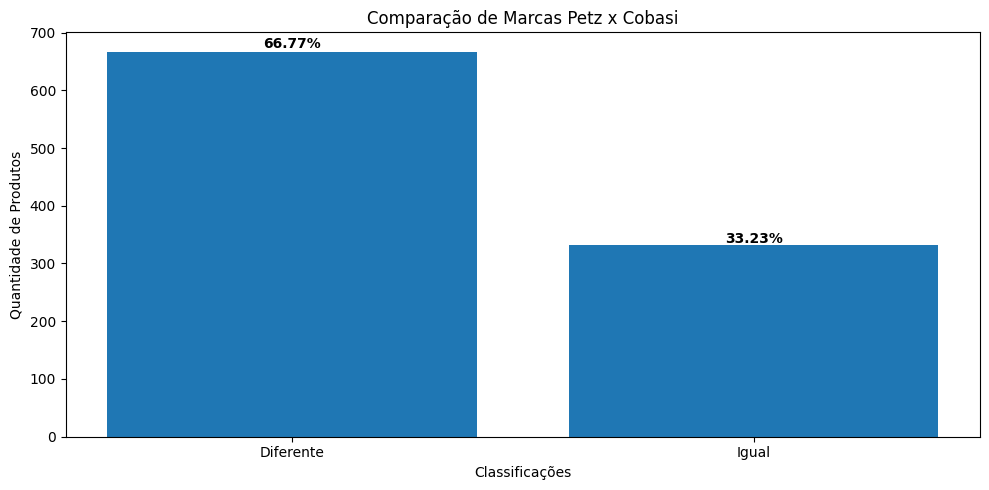

In [6]:
x1 = ("Diferente","Igual")
total = df["nome_petz"].count()

y1 = (df[df["marca_petz"]!=df["marca_cobasi"]]["nome_petz"].count(),df[df["marca_petz"]==df["marca_cobasi"]]["nome_petz"].count())

plt.figure(figsize=(10,5))

graph = plt.bar(x1, y1)
plt.ylabel("Quantidade de Produtos")
plt.xlabel("Classificações")
plt.title("Comparação de Marcas Petz x Cobasi")

for i,p in enumerate(graph):
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(round(y1[i]/total*100,2))+'%',
             ha='center',
             weight='bold')

plt.tight_layout()

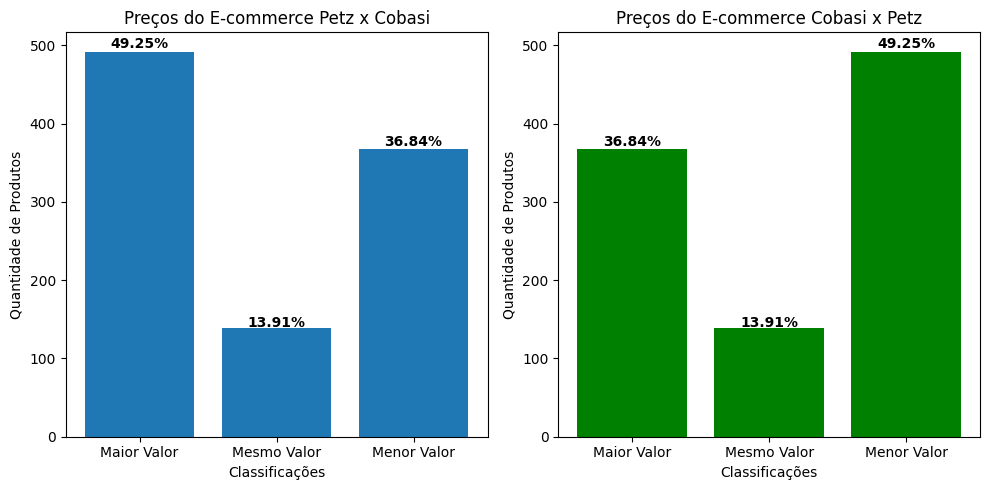

In [7]:
x1 = ("Maior Valor","Mesmo Valor","Menor Valor")
x2 = x1
total = df["nome_petz"].count()

y1 = (df[df["preco_petz"]>df["preco_cobasi"]]["nome_petz"].count(),df[df["preco_petz"]==df["preco_cobasi"]]["nome_petz"].count(),df[df["preco_petz"]<df["preco_cobasi"]]["nome_petz"].count())
y2 = (df[df["preco_petz"]<df["preco_cobasi"]]["nome_petz"].count(),df[df["preco_petz"]==df["preco_cobasi"]]["nome_petz"].count(),df[df["preco_petz"]>df["preco_cobasi"]]["nome_petz"].count())

plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
graph = plt.bar(x1, y1)
plt.ylabel("Quantidade de Produtos")
plt.xlabel("Classificações")
plt.title("Preços do E-commerce Petz x Cobasi")

for i,p in enumerate(graph):
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(round(y1[i]/total*100,2))+'%',
             ha='center',
             weight='bold')

plt.subplot(1, 2, 2)
graph = plt.bar(x2, y2, color = "green")
plt.ylabel("Quantidade de Produtos")
plt.xlabel("Classificações")
plt.title("Preços do E-commerce Cobasi x Petz")

for i,p in enumerate(graph):
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(round(y2[i]/total*100,2))+'%',
             ha='center',
             weight='bold')


plt.tight_layout()

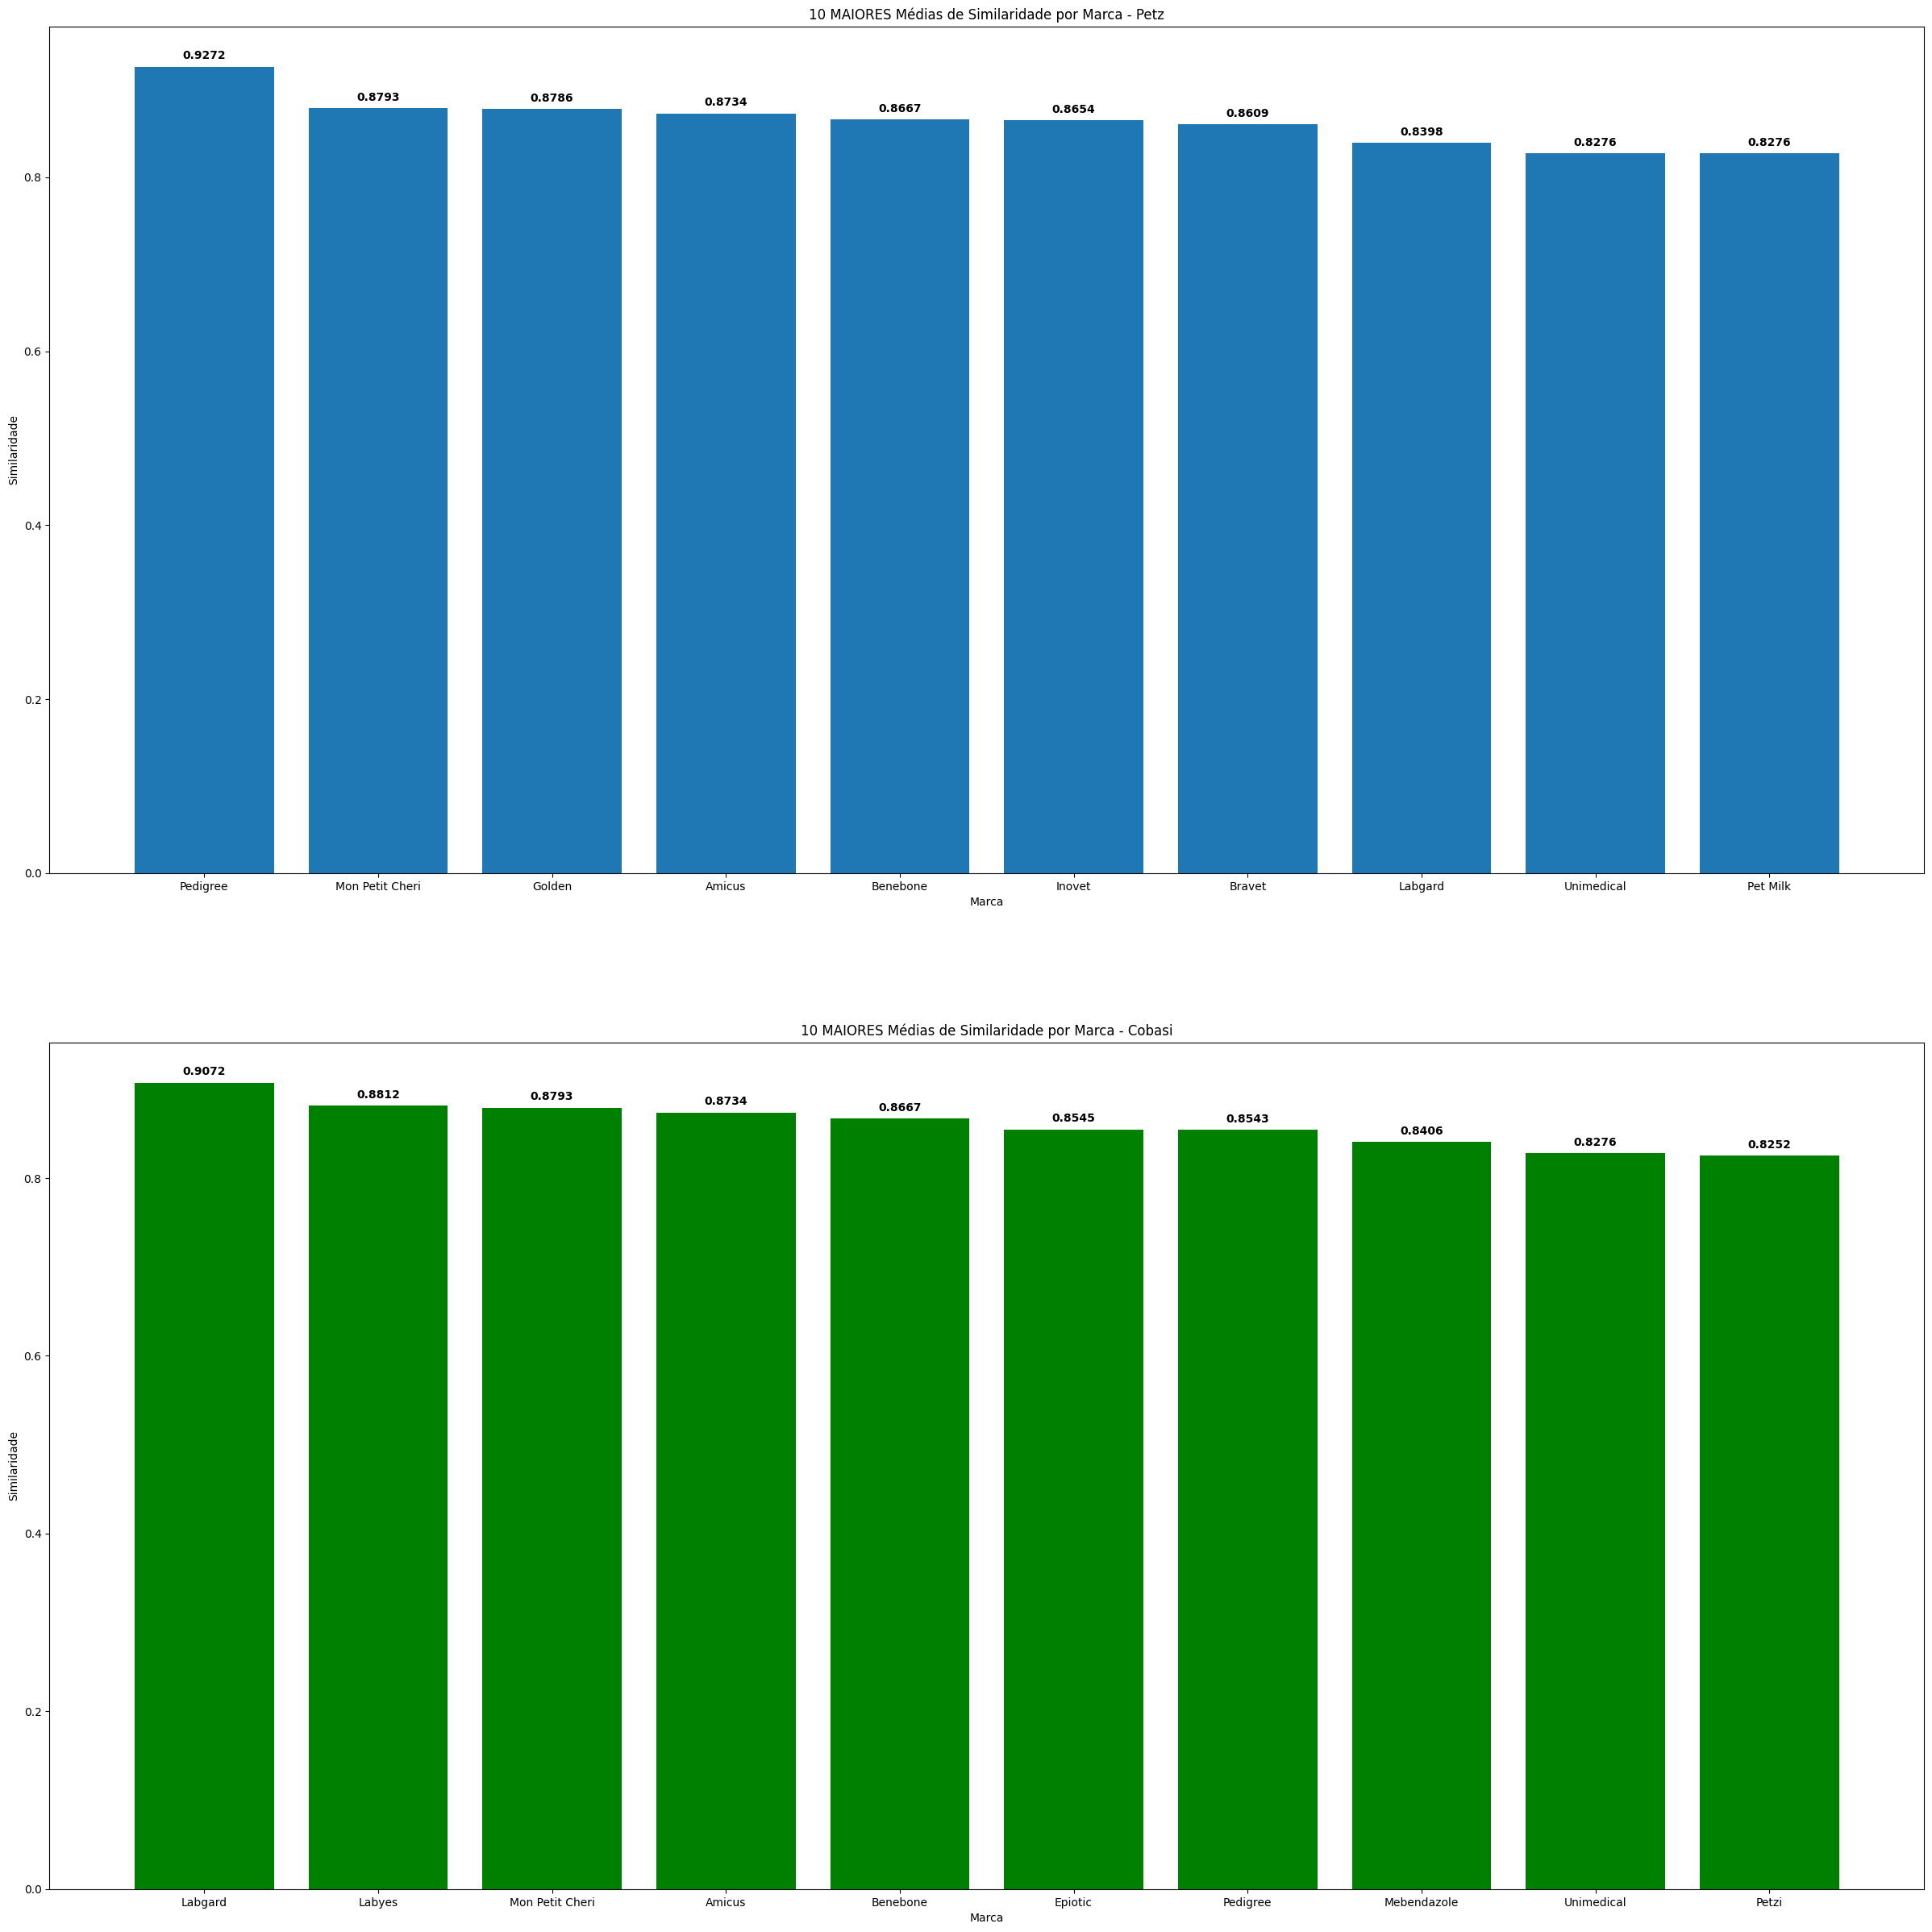

In [10]:
sp = df[["marca_petz","similaridade"]].groupby("marca_petz").mean("similaridade").sort_values(by='similaridade',ascending=False).head(10) - 1
sp.reset_index(inplace=True)

sc = df[["marca_cobasi","similaridade"]].groupby("marca_cobasi").mean("similaridade").sort_values(by='similaridade',ascending=False).head(10) - 1
sc.reset_index(inplace=True)

x1 = sp["marca_petz"]
x2 = sc["marca_cobasi"]

y1 = sp.similaridade
y2 = sc.similaridade

plt.figure(figsize=(30,20))

plt.subplot(2, 1, 1)
graph = plt.bar(x1, y1)
plt.ylabel("Similaridade")
plt.xlabel("Marca")
plt.title("10 MAIORES Médias de Similaridade por Marca - Petz")
for i,p in enumerate(graph):
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             round(y1[i],4),
             ha='center',
             weight='bold')


plt.subplot(2, 1, 2)
graph = plt.bar(x2, y2, color = "green")
plt.ylabel("Similaridade")
plt.xlabel("Marca")
plt.title("10 MAIORES Médias de Similaridade por Marca - Cobasi")
for i,p in enumerate(graph):
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             round(y2[i],4),
             ha='center',
             weight='bold')

plt.tight_layout()

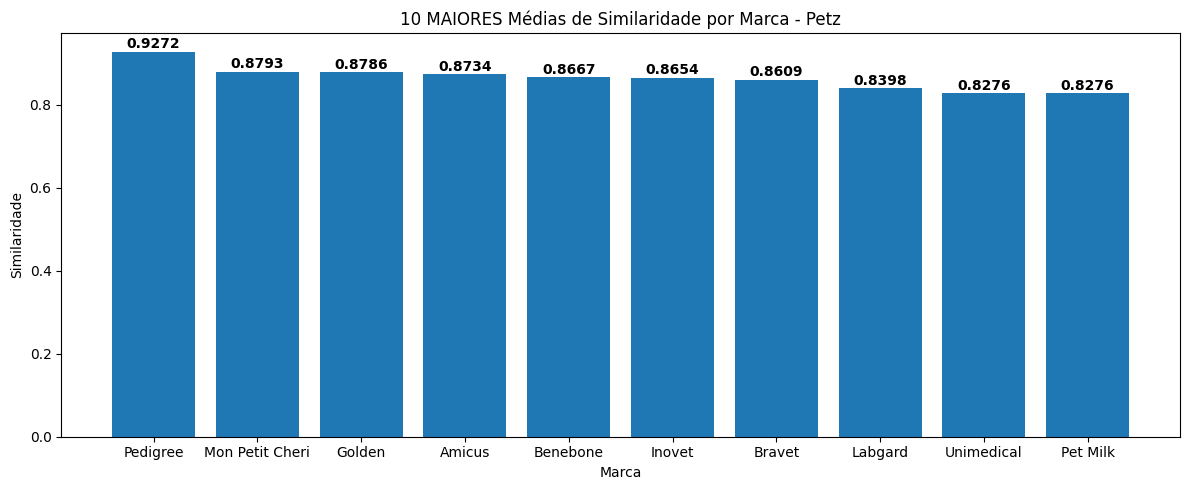

In [22]:
plt.figure(figsize=(12,5))
graph = plt.bar(x1, y1)
plt.ylabel("Similaridade")
plt.xlabel("Marca")
plt.title("10 MAIORES Médias de Similaridade por Marca - Petz")
for i,p in enumerate(graph):
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             round(y1[i],4),
             ha='center',
             weight='bold')

plt.tight_layout()

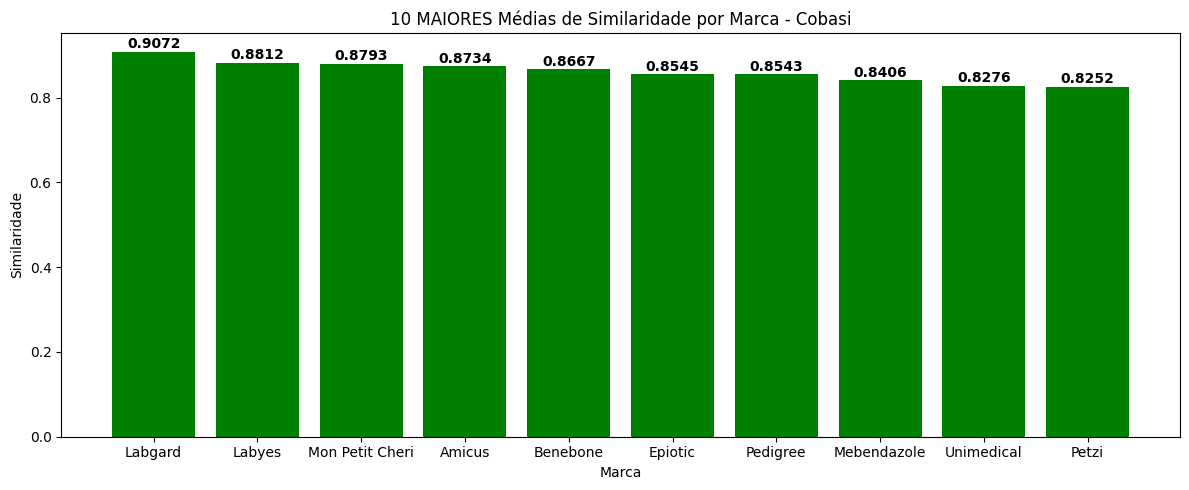

In [24]:
plt.figure(figsize=(12,5))
graph = plt.bar(x2, y2, color = "green")
plt.ylabel("Similaridade")
plt.xlabel("Marca")
plt.title("10 MAIORES Médias de Similaridade por Marca - Cobasi")
for i,p in enumerate(graph):
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             round(y2[i],4),
             ha='center',
             weight='bold')

plt.tight_layout()